# Genetic Disorder Prediction Using Machine Learning Models: An Explainable AI Approach


>### by Suchetan Ghosh & Monish Gosar

## Project Description

This project aims to leverage the capabilities of machine learning (ML) models to predict genetic disorders based on various inputs, utilizing an Explainable AI (XAI) framework to enhance the transparency and understandability of the predictions. By analyzing genetic data and correlating it with known disorders, the project seeks to develop predictive models that are not only accurate but also provide insights into the factors influencing these predictions.

## Project Scope

The scope of this project encompasses:

- Collection and preprocessing of genetic data relevant to the disorders in question.
- Exploration and analysis of the data to identify key features relevant to genetic disorders.
- Development and training of ML models to predict the likelihood of genetic disorders.
- Implementation of Explainable AI techniques to interpret the decisions made by the ML models, providing insights into the prediction process.
- Evaluation of the models' performance and the effectiveness of the XAI approaches in making the predictions understandable.

## Problem Statement

The prediction of genetic disorders presents a significant challenge due to the complex nature of genetic information and its influence on health outcomes. Traditional predictive models often act as "black boxes," offering little to no insight into how predictions are made. This lack of transparency can hinder trust and applicability in clinical settings. Our project addresses the need for accurate predictive models that not only forecast genetic disorders but also provide explanations for their predictions, thereby making the models more interpretable and trustworthy for medical professionals and patients.


## Methodology 

- **Data Preparation and Analysis**: Initial steps involved cleaning, preprocessing, and analyzing the dataset to understand the distribution of genetic traits and their associations with specific disorders.
- **Model Development**: Multiple ML models were developed, trained, and tested on the dataset to identify the most effective algorithm for predicting genetic disorders.
- **Explainable AI Implementation**: Techniques such as feature importance, SHAP (SHapley Additive exPlanations), and LIME (Local Interpretable Model-agnostic Explanations) were implemented to elucidate how the model's predictions are influenced by different input features.


## Code 

### Importing necessary modules and Loading the dataset

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
import shap
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score


In [5]:
df = pd.read_csv("train_pre.csv", index_col=0)
df

Patient_Age  Genes_Mother_Side  Inherited_Father  Maternal_Gene  \
0              2.0                  1                 0              1   
1              4.0                  1                 1              0   
2              6.0                  1                 0              0   
3             12.0                  1                 0              1   
4             11.0                  1                 0              1   
...            ...                ...               ...            ...   
22078          4.0                  1                 1              1   
22079          8.0                  0                 1              0   
22080          8.0                  1                 0              1   
22081          7.0                  1                 0              1   
22082         11.0                  1                 0              0   

       Paternal_Gene  Blood_Cell_mcL  Mother_Age  Father_Age  Status  \
0                  0        4.760603        35.0        42.0       1   
1                  0        4.910669        35.0        23.0       0   
2                  0        4.893297        41.0        22.0       1   
3                  0        4.705280        21.0        42.0       0   
4                  1        4.720703        32.0        42.0       1   
...              ...             ...         ...         ...     ...   
22078              0        5.258298        35.0        64.0       0   
22079              1        4.974220        35.0        56.0       1   
22080              0        5.186470        35.0        51.0       0   
22081              1        4.858543        19.0        42.0       1   
22082              0        4.738067        32.0        62.0       0   

       Respiratory_Rate_Breaths_Min  ...  Previous_Abortion  Birth_Defects  \
0                                 1  ...                2.0              1   
1                                 0  ...                2.0              0   
2                                 1  ...                4.0              1   
3                                 0  ...                1.0              1   
4                                 0  ...                4.0              0   
...                             ...  ...                ...            ...   
22078                             1  ...                3.0              0   
22079                             1  ...                2.0              0   
22080                             0  ...                2.0              1   
22081                             0  ...                1.0              0   
22082                             1  ...                4.0              1   

       White_Blood_Cell  Blood_Test_Result  Genetic_Disorder  \
0              9.857562                  0                 0   
1              5.522560                  1                 0   
2              7.477132                  1                 1   
3              7.919321                  2                 0   
4              4.098210                  0                 1   
...                 ...                ...               ...   
22078          6.584811                  2                 0   
22079          7.041556                  2                 1   
22080          7.715464                  1                 0   
22081          8.437670                  3                 0   
22082         11.188371                  1                 1   

       Disorder_Subclass  Average_Parental Age  Age_Difference  \
0                      0                  38.5             7.0   
1                      1                  29.0            12.0   
2                      2                  31.5            19.0   
3                      3                  31.5            21.0   
4                      4                  37.0            10.0   
...                  ...                   ...             ...   
22078                  3                  49.5            29.0   
22079              

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22083 entries, 0 to 22082
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   22083 non-null  float64
 1   Genes_Mother_Side             22083 non-null  int64  
 2   Inherited_Father              22083 non-null  int64  
 3   Maternal_Gene                 22083 non-null  int64  
 4   Paternal_Gene                 22083 non-null  int64  
 5   Blood_Cell_mcL                22083 non-null  float64
 6   Mother_Age                    22083 non-null  float64
 7   Father_Age                    22083 non-null  float64
 8   Status                        22083 non-null  int64  
 9   Respiratory_Rate_Breaths_Min  22083 non-null  int64  
 10  Heart_Rates_Min               22083 non-null  int64  
 11  Follow_Up                     22083 non-null  int64  
 12  Gender                        22083 non-null  int64  
 13  B

### Basic EDA

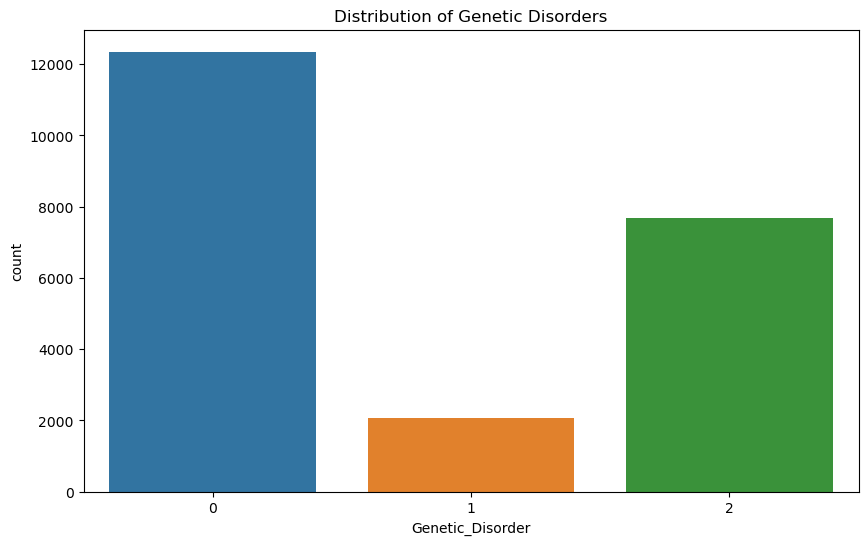

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Genetic_Disorder', data=df)
plt.title('Distribution of Genetic Disorders')
plt.show()

# 0 : 'Mitochondrial genetic inheritance disorders',
# 1 : 'Multifactorial genetic inheritance disorders',
# 2 : 'Single-gene inheritance diseases'

array([[<Axes: title={'center': 'Patient_Age'}>,
        <Axes: title={'center': 'Blood_Cell_mcL'}>,
        <Axes: title={'center': 'Mother_Age'}>],
       [<Axes: title={'center': 'Father_Age'}>,
        <Axes: title={'center': 'Average_Parental Age'}>,
        <Axes: title={'center': 'Age_Difference'}>],
       [<Axes: title={'center': 'White_Blood_Cell'}>, <Axes: >, <Axes: >]],
      dtype=object)

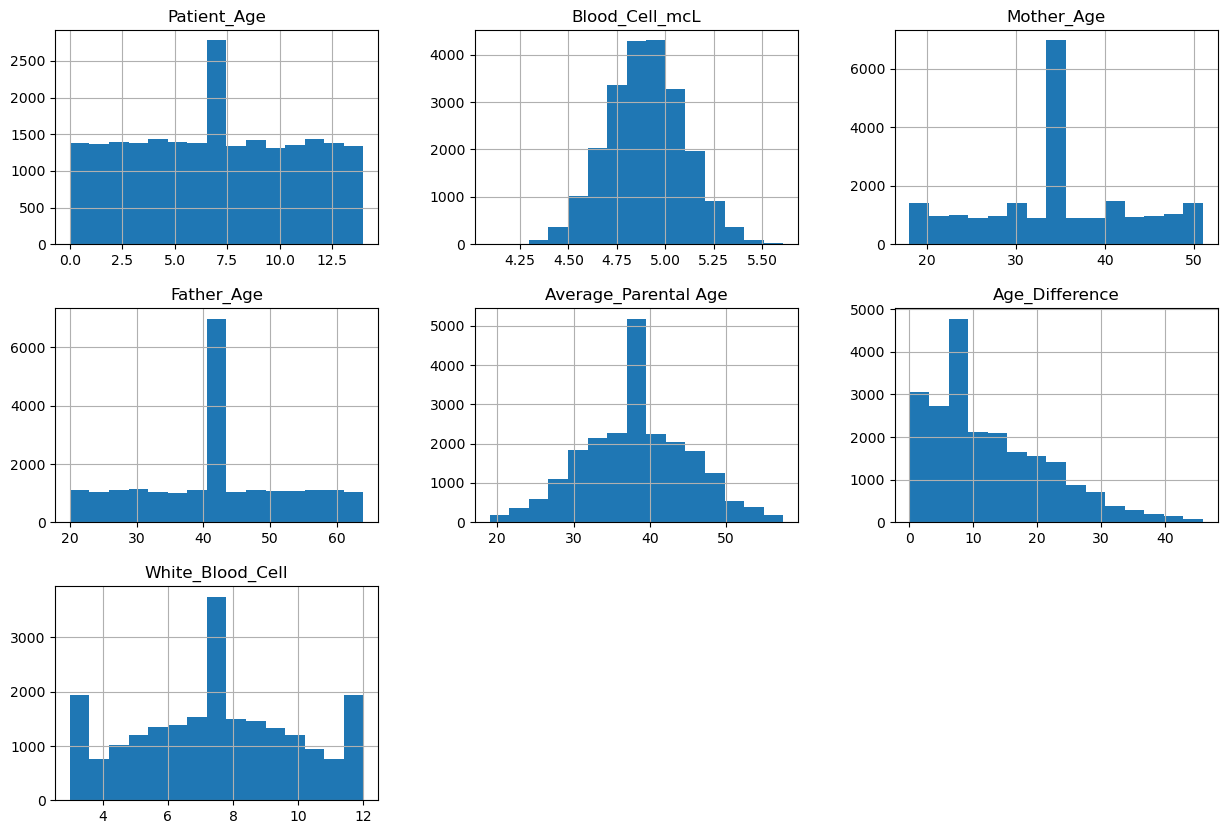

In [8]:
continuous_columns = ['Patient_Age', 'Blood_Cell_mcL', 'Mother_Age', 'Father_Age', 'Average_Parental Age', 'Age_Difference', 'White_Blood_Cell']
df[continuous_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))

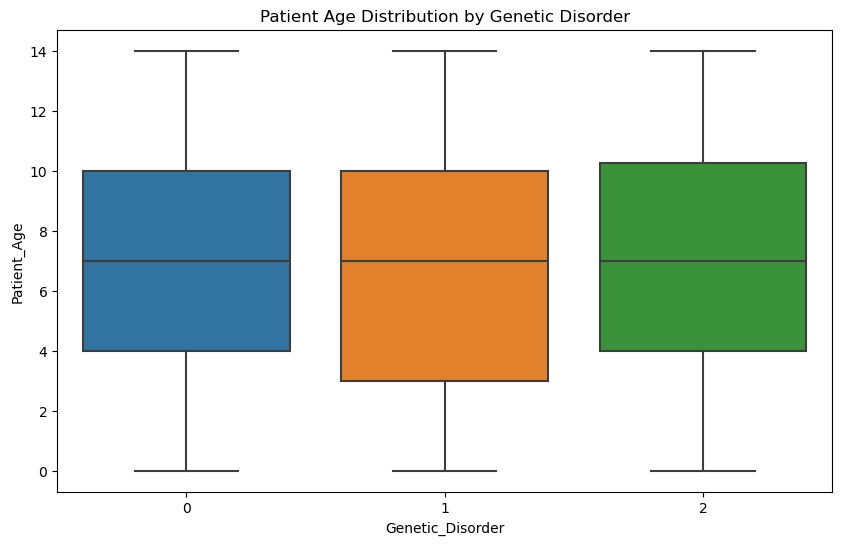

In [9]:
# Example for 'Patient_Age' by 'Genetic_Disorder'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genetic_Disorder', y='Patient_Age', data=df)
plt.title('Patient Age Distribution by Genetic Disorder')
plt.show()


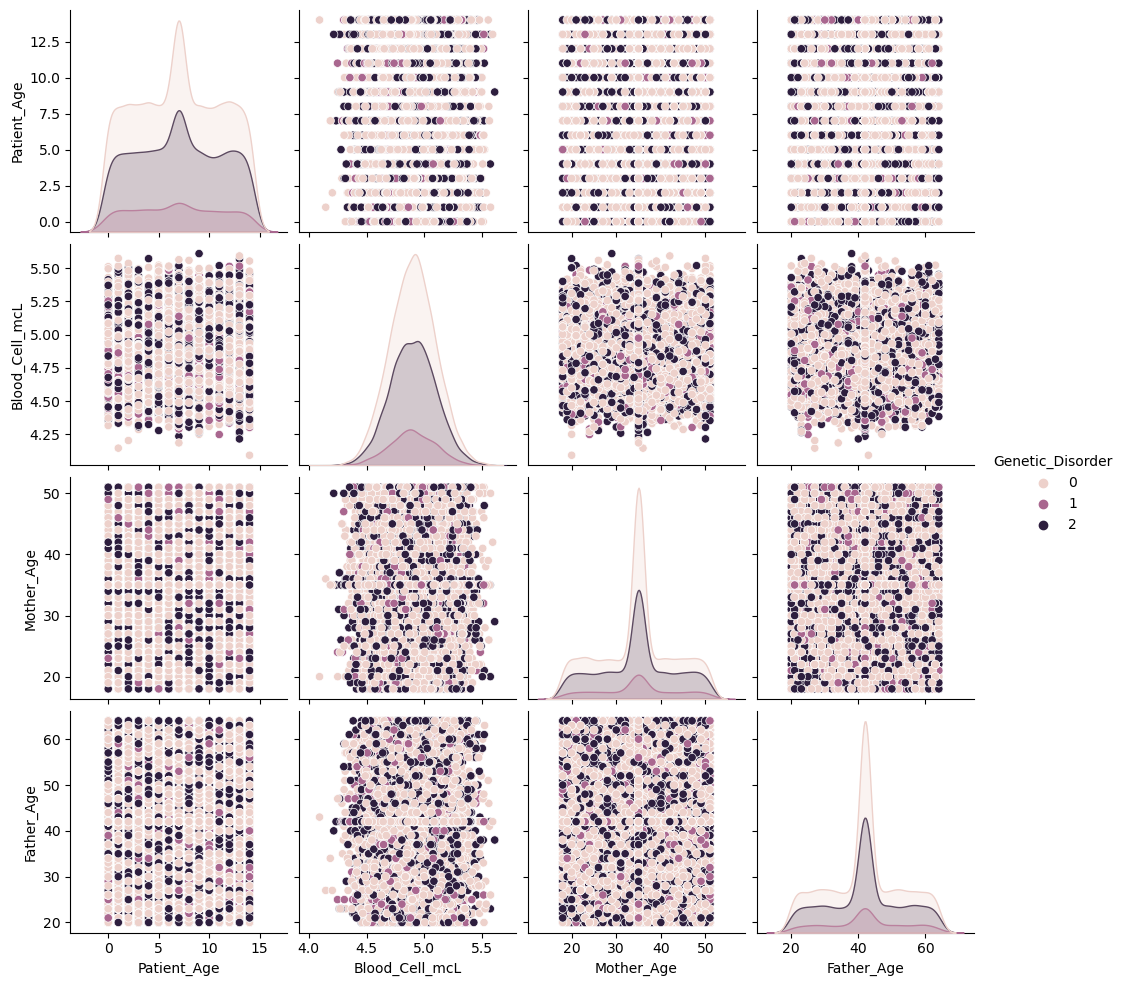

In [10]:
sns.pairplot(df[['Patient_Age', 'Blood_Cell_mcL', 'Mother_Age', 'Father_Age', 'Genetic_Disorder']], hue='Genetic_Disorder')
plt.show()


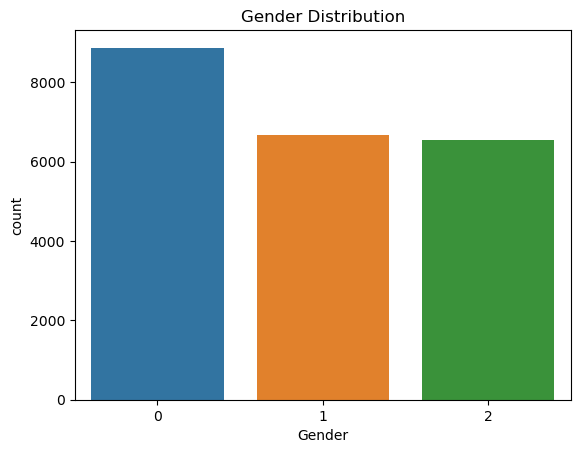

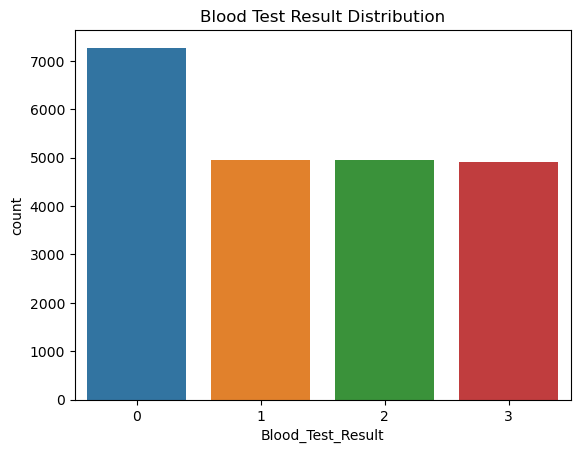

In [11]:
# Example for 'Gender'
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Example for 'Blood_Test_Result'
sns.countplot(x='Blood_Test_Result', data=df)
plt.title('Blood Test Result Distribution')
plt.show()


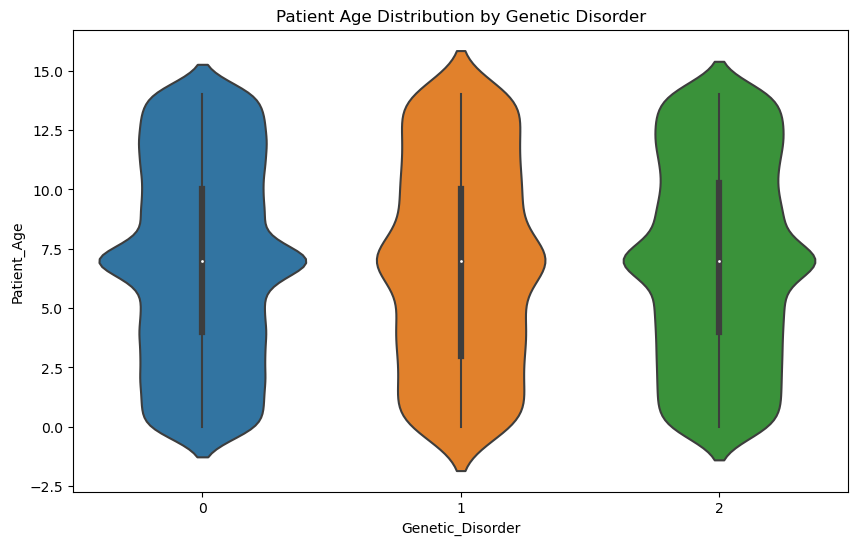

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Genetic_Disorder', y='Patient_Age', data=df)
plt.title('Patient Age Distribution by Genetic Disorder')
plt.show()


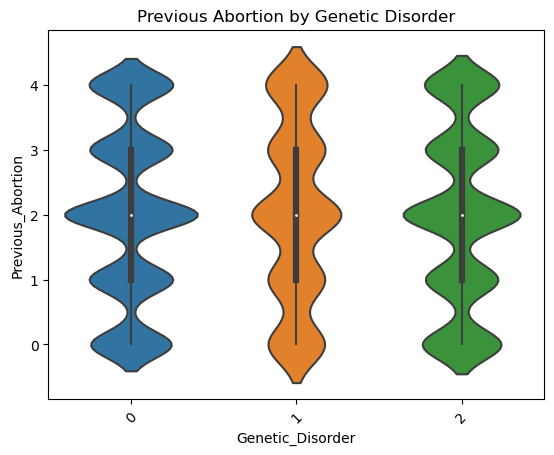

In [13]:
sns.violinplot(x='Genetic_Disorder', y='Previous_Abortion', data=df)
plt.title('Previous Abortion by Genetic Disorder')
plt.xticks(rotation=45)
plt.show()


### Inference From Basic EDA

>1. The pairplot reveals that there's no clear linear relationship or distinct grouping between the continuous features based on genetic disorder categories, indicating that linear models may not be best suited for this classification task.

>2. The median age for all categories of genetic disorders is similar, but there's variability in age distribution, especially for category 1, which might suggest a wider age range of onset or diagnosis.

>3. The histograms indicate that most features are not normally distributed. Father_Age, Mother_Age, and White_Blood_Cell show a bimodal distribution, and Age_Difference is right-skewed.

>4. There's a class imbalance with category 0 having the highest count and category 1 the lowest, which may impact the performance of machine learning models and might require techniques to address imbalance.

### Initial Modelling with Different Test Size

In [14]:
x = df.drop("Genetic_Disorder", axis=1)
y = df["Genetic_Disorder"]

def dataSplit(X, Y, testSize):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=testSize, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [15]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0),  
    "Neural Network": MLPClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis()
}


In [16]:
def evaluate_model(model_name, model, X_train, y_train, X_test, y_test, results_df):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro', zero_division=0)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    new_row = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    }
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)
    
    return results_df


In [17]:
results_by_test_size = {}

splitSizes = [0.1, 0.2, 0.25, 0.3, 0.15]

for s in splitSizes:
    X_train_scaled, X_test_scaled, y_train, y_test = dataSplit(x, y, s)
    
    results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    
    for name, model in models.items():
        results_df = evaluate_model(name, model, X_train_scaled, y_train, X_test_scaled, y_test, results_df)
    
    y_train_categorical = to_categorical(y_train)
    SimpleNN_Model = Sequential([Dense(100, activation='relu'), 
                        Dense(75, activation='relu'), 
                        Dense(50, activation='relu'), 
                        Dense(25, activation='relu'), 
                        Dense(10, activation='relu'), 
                        Dense(3, activation='softmax')])
    SimpleNN_Model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    SimpleNN_Model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=128, verbose=0)

    # Predict with the TensorFlow/Keras model
    predictions_categorical = SimpleNN_Model.predict(X_test_scaled)
    predictions = np.argmax(predictions_categorical, axis=1)

    accuracy_NN = accuracy_score(y_test, predictions)
    precision_NN = precision_score(y_test, predictions, average='macro', zero_division=0)
    recall_NN = recall_score(y_test, predictions, average='macro')
    f1_NN = f1_score(y_test, predictions, average='macro')

    new_row = {
        'Model': "Tensorflow Neural Network",
        'Accuracy': accuracy_NN,
        'Precision': precision_NN,
        'Recall': recall_NN,
        'F1': f1_NN
    }
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)
    
    results_by_test_size[f"{int(s*100)}"] = results_df

    print(f"Model Evaluation for Test Size {int(s*100)}%")
    print(results_df)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model Evaluation for Test Size 10%
                           Model  Accuracy  Precision    Recall        F1
0                  Random Forest  0.895428   0.899418  0.860574  0.878079
1            Logistic Regression  0.622454   0.408848  0.403652  0.383080
2                            SVM  0.625622   0.410470  0.405675  0.384727
3         Extra Trees Classifier  0.867361   0.887354  0.758375  0.799678
4       Decision Tree Classifier  0.851064   0.837154  0.864119  0.849735
5            K-Nearest Neighbors  0.523314   0.390827  0.361190  0.358591
6                        XGBoost  0.920326   0.916304  0.923245  0.919723
7                       LightGBM  0.922137   0.917739  0.928722  0.923101
8                       CatBoost  0.922137   0.917739  0.928722  0.923101
9                 Neural Network  0.892259   0.879392  0.875890  0.877468
10  Linear Discriminant Analysis  0.627886   0.411994  0.409460  0.389922
11     Tensorflow Neural Network  0.91

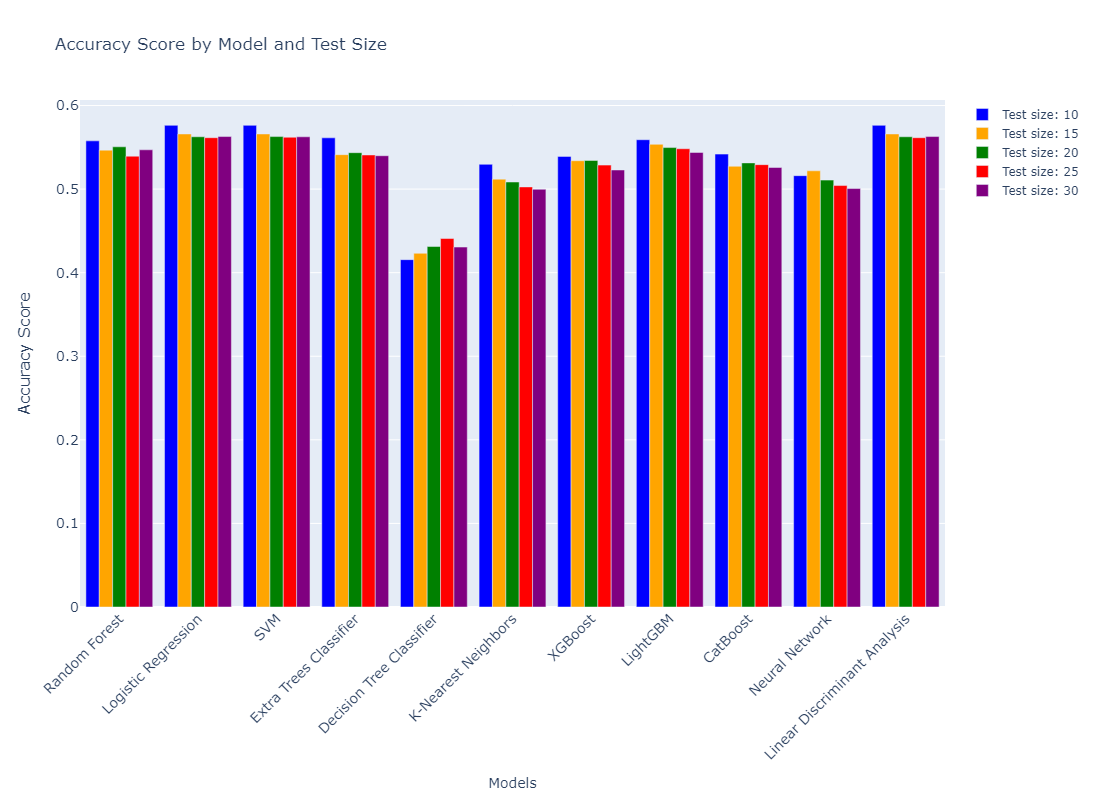

In [40]:
import plotly.graph_objects as go

fig = go.Figure()

model_order = [
    "Random Forest",
    "Logistic Regression",
    "SVM",
    "Extra Trees Classifier",
    "Decision Tree Classifier",
    "K-Nearest Neighbors",
    "XGBoost",
    "LightGBM",
    "CatBoost",
    "Neural Network" ,
    "Linear Discriminant Analysis"     
]


colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, (test_size, df) in enumerate(sorted(results_by_test_size.items())):
    df = df.set_index('Model').reindex(model_order).reset_index()
    
    fig.add_trace(
        go.Bar(
            name=f"Test size: {test_size}",
            x=df['Model'],  # x-axis labels (model names)
            y=df['Accuracy'],  # y-axis labels (accuracy values)
            marker_color=colors[i % len(colors)]  # color for each test size
        )
    )

fig.update_layout(
    height=800,
    title_text='Accuracy Score by Model and Test Size',
    xaxis=dict(
        title='Models',
        tickangle=-45,
        tickfont_size=14
    ),
    yaxis=dict(
        title='Accuracy Score',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,  
    bargroupgap=0.
)

fig.show()


### Feature Selection using ETRF

In [24]:
df = pd.read_csv('Dataset.csv',index_col=0)
df.head()

Patient_Age  Genes_Mother_Side  Inherited_Father  Maternal_Gene  \
0          2.0                  1                 0              1   
1          4.0                  1                 1              0   
2          6.0                  1                 0              0   
3         12.0                  1                 0              1   
4         11.0                  1                 0              1   

   Paternal_Gene  Blood_Cell_mcL  Mother_Age  Father_Age  Status  \
0              0        4.760603        35.0        42.0       1   
1              0        4.910669        35.0        23.0       0   
2              0        4.893297        41.0        22.0       1   
3              0        4.705280        21.0        42.0       0   
4              1        4.720703        32.0        42.0       1   

   Respiratory_Rate_Breaths_Min  ...  Previous_Abortion  Birth_Defects  \
0                             1  ...                2.0              1   
1                             0  ...                2.0              0   
2                             1  ...                4.0              1   
3                             0  ...                1.0              1   
4                             0  ...                4.0              0   

   White_Blood_Cell  Blood_Test_Result  Genetic_Disorder  Disorder_Subclass  \
0          9.857562                  0                 0                  0   
1          5.522560                  1                 0                  1   
2          7.477132                  1                 1                  2   
3          7.919321                  2                 0                  3   
4          4.098210                  0                 1                  4   

   Average_Parental Age  Age_Difference  Number_of_Genes_Inherited  \
0                  38.5             7.0                          1   
1                  29.0            12.0                          2   
2                  31.5            19.0                          1   
3                  31.5            21.0                          1   
4                  37.0            10.0                          1   

   Combined_Gene_Inheritance  
0                          1  
1                          1  
2                          0  
3                          1  
4                          1  

[5 rows x 32 columns]

In [26]:
x = df.drop(["Genetic_Disorder","Disorder_Subclass"],axis=1)
y = df["Genetic_Disorder"]

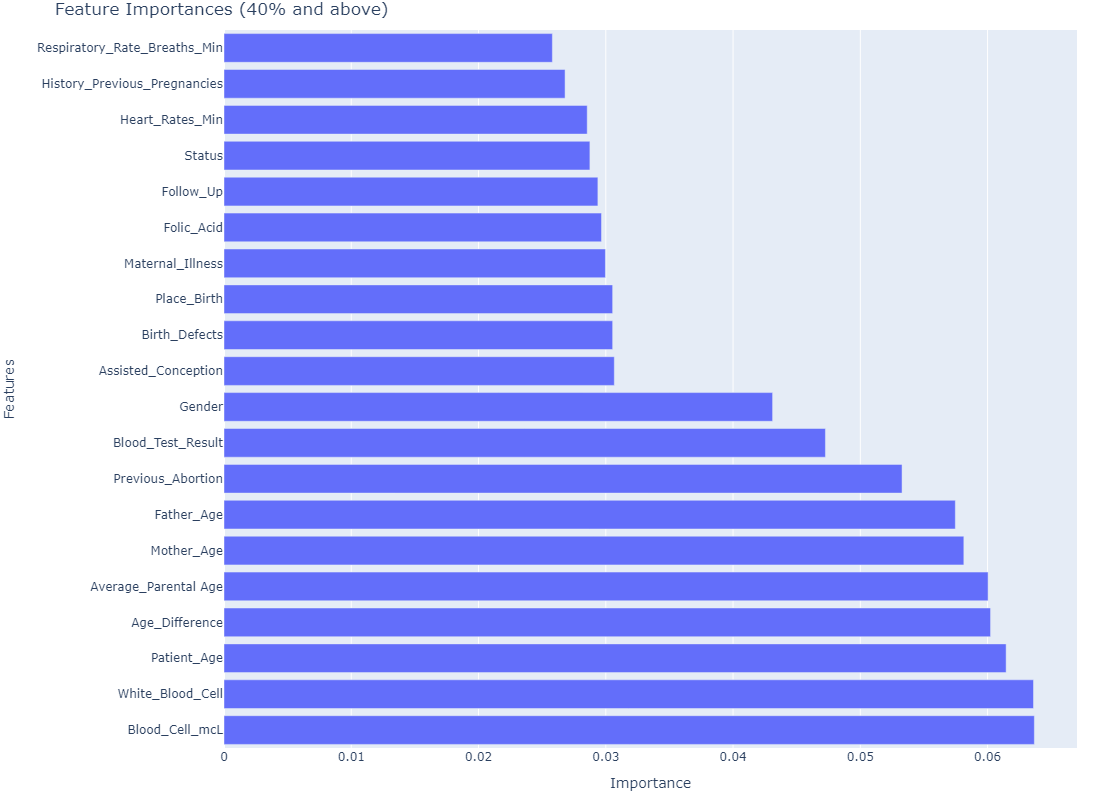

In [27]:
import plotly.graph_objects as go
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(x, y)

feature_importances = clf.feature_importances_

threshold = 0.4 * max(feature_importances)

features = x.columns

important_indices = [i for i, imp in enumerate(feature_importances) if imp >= threshold]
important_features = features[important_indices]
important_importances = feature_importances[important_indices]

sorted_indices = np.argsort(important_importances)[::-1]
sorted_features = important_features[sorted_indices]
sorted_importances = important_importances[sorted_indices]

fig = go.Figure([
    go.Bar(
        x=sorted_importances,  
        y=sorted_features,  
        orientation='h'  
    )
])

fig.update_layout(
    title='Feature Importances (40% and above)',
    xaxis=dict(title='Importance'),
    yaxis=dict(title='Features'),
    yaxis_tickfont_size=12,
    height=800,  
    margin=dict(l=20, r=20, t=30, b=20)  
)

fig.show()


### Modelling Using Feature Importance 

In [29]:
x = df[important_features]
y = df["Genetic_Disorder"]

def dataSplit(X, Y, testSize):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=testSize, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [30]:
# Define the models with default settings
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0),  # To keep the output clean
    "Neural Network": MLPClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis()
}


In [31]:
def evaluate_model(model_name, model, X_train, y_train, X_test, y_test, results_df):
    # Train the model on the training data
    model.fit(X_train, y_train)
    # Make predictions on the testing data
    predictions = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro', zero_division=0)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    # Append the results to the results DataFrame
    new_row = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    }
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)
    
    return results_df


In [32]:
results_by_test_size = {}

splitSizes = [0.1, 0.2, 0.25, 0.3, 0.15]

for s in splitSizes:
    X_train_scaled, X_test_scaled, y_train, y_test = dataSplit(x, y, s)
    
    results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    
    for name, model in models.items():
        results_df = evaluate_model(name, model, X_train_scaled, y_train, X_test_scaled, y_test, results_df)
    
    y_train_categorical = to_categorical(y_train)
    SimpleNN_Model = Sequential([Dense(100, activation='relu'), 
                        Dense(75, activation='relu'), 
                        Dense(50, activation='relu'), 
                        Dense(25, activation='relu'), 
                        Dense(10, activation='relu'), 
                        Dense(3, activation='softmax')])
    SimpleNN_Model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    SimpleNN_Model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=128, verbose=0)

    # Predict with the TensorFlow/Keras model
    predictions_categorical = SimpleNN_Model.predict(X_test_scaled)
    predictions = np.argmax(predictions_categorical, axis=1)

    accuracy_NN = accuracy_score(y_test, predictions)
    precision_NN = precision_score(y_test, predictions, average='macro', zero_division=0)
    recall_NN = recall_score(y_test, predictions, average='macro')
    f1_NN = f1_score(y_test, predictions, average='macro')

    new_row = {
        'Model': "Tensorflow Neural Network",
        'Accuracy': accuracy_NN,
        'Precision': precision_NN,
        'Recall': recall_NN,
        'F1': f1_NN
    }
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)
    
    results_by_test_size[f"{int(s*100)}"] = results_df

    print(f"Model Evaluation for Test Size {int(s*100)}%")
    print(results_df)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model Evaluation for Test Size 10%
                           Model  Accuracy  Precision    Recall        F1
0                  Random Forest  0.557718   0.303533  0.332881  0.276564
1            Logistic Regression  0.576279   0.192093  0.333333  0.243730
2                            SVM  0.576279   0.358806  0.333714  0.245426
3         Extra Trees Classifier  0.561340   0.327822  0.342784  0.300397
4       Decision Tree Classifier  0.415573   0.313037  0.310707  0.310868
5            K-Nearest Neighbors  0.529651   0.383416  0.356597  0.349252
6                        XGBoost  0.539158   0.343777  0.330033  0.290850
7                       LightGBM  0.559077   0.294440  0.330620  0.267170
8                       CatBoost  0.541874   0.308339  0.334000  0.297994
9                 Neural Network  0.516071   0.390637  0.339230  0.323482
10  Linear Discriminant Analysis  0.576279   0.192093  0.333333  0.243730
11     Tensorflow Neural Network  0.52

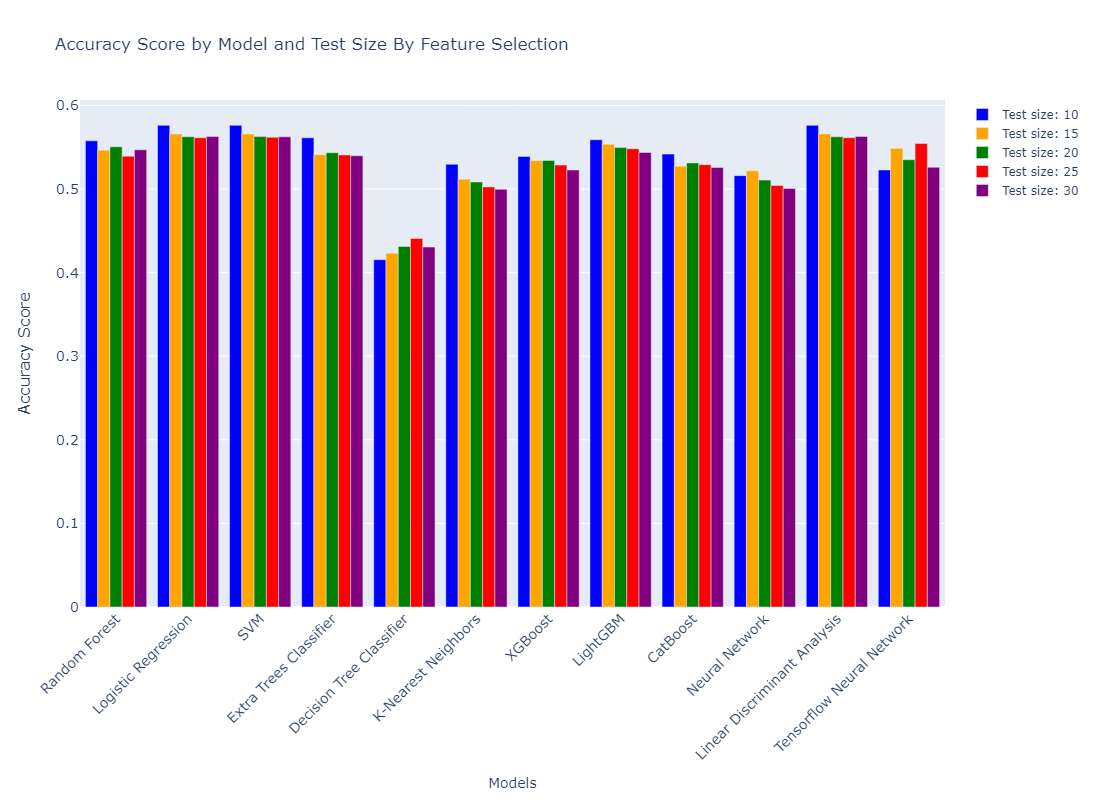

In [58]:
import plotly.graph_objects as go

fig = go.Figure()

model_order = [
    "Random Forest",
    "Logistic Regression",
    "SVM",
    "Extra Trees Classifier",
    "Decision Tree Classifier",
    "K-Nearest Neighbors",
    "XGBoost",
    "LightGBM",
    "CatBoost",
    "Neural Network" ,
    "Linear Discriminant Analysis" ,
    "Tensorflow Neural Network"
    
]


colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, (test_size, df) in enumerate(sorted(results_by_test_size.items())):
    df = df.set_index('Model').reindex(model_order).reset_index()
    
    fig.add_trace(
        go.Bar(
            name=f"Test size: {test_size}",
            x=df['Model'],  # x-axis labels (model names)
            y=df['Accuracy'],  # y-axis labels (accuracy values)
            marker_color=colors[i % len(colors)]  # color for each test size
        )
    )

fig.update_layout(
    height=800,
    title_text='Accuracy Score by Model and Test Size By Feature Selection',
    xaxis=dict(
        title='Models',
        tickangle=-45,
        tickfont_size=14
    ),
    yaxis=dict(
        title='Accuracy Score',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,  
    bargroupgap=0.
)

fig.show()


### **Inferences for Results**


### Before Feature Selection:
- The bar graph indicates several machine learning models, including Random Forest, Logistic Regression, SVM, Extra Trees Classifier, Decision Tree Classifier, K-Nearest Neighbors, XGBoost, LightGBM, CatBoost, Neural Network, and Linear Discriminant Analysis.
- The test sizes used are 10, 15, 20, 25, and 30, which are likely percentages of the total data used for testing the model.
- Logistic Regression seems to perform the best across all test sizes, with an accuracy score slightly above 0.56 when the test size is 30.
- Other models like the Decision Tree Classifier and K-Nearest Neighbors seem to perform worse when the test size increases.
- The performance of the models varies, but no model exceeds an accuracy score of approximately 0.6, suggesting moderate predictive performance.

### After Feature Selection:
- The same models are evaluated, but this time after a process of feature selection has been applied, which typically involves selecting a subset of the most informative features.
- The overall trend suggests that feature selection has had a mixed impact on model performance. Some models show improvement in accuracy scores, while others show a decline or remain approximately the same.
- It's notable that the accuracy scores are very similar across different test sizes for each model. This could indicate that the models have a consistent performance regardless of the test size after feature selection.
- The performance is still moderate, with accuracy scores not substantially different from those before feature selection.

### Inference:
- The purpose of feature selection is to improve model performance by removing irrelevant or redundant features that do not contribute much to the predictive power of the model.
- In this case, feature selection does not dramatically change the overall accuracy of the models. This could mean that either the feature selection process did not remove many features, the removed features were not impacting model performance significantly, or the models were already doing as well as they could with the given data.
- Logistic Regression consistently shows as the best performing model, suggesting that for this specific dataset, a simpler linear approach may be more suitable than more complex models.
- The relatively flat accuracy across different test sizes suggests the models are stable, and their performance is not highly sensitive to the specific subset of data used for testing.
- These graphs could be used for model selection, showing that depending on the complexity and nature of the data, sometimes simpler models may perform as well or better than more complex ones, even after attempting to optimize with feature selection.

## Explainable AI (XAI)

In [75]:
df = pd.read_csv("Dataset.csv", index_col=0)
df

Patient_Age  Genes_Mother_Side  Inherited_Father  Maternal_Gene  \
0              2.0                  1                 0              1   
1              4.0                  1                 1              0   
2              6.0                  1                 0              0   
3             12.0                  1                 0              1   
4             11.0                  1                 0              1   
...            ...                ...               ...            ...   
22078          4.0                  1                 1              1   
22079          8.0                  0                 1              0   
22080          8.0                  1                 0              1   
22081          7.0                  1                 0              1   
22082         11.0                  1                 0              0   

       Paternal_Gene  Blood_Cell_mcL  Mother_Age  Father_Age  Status  \
0                  0        4.760603        35.0        42.0       1   
1                  0        4.910669        35.0        23.0       0   
2                  0        4.893297        41.0        22.0       1   
3                  0        4.705280        21.0        42.0       0   
4                  1        4.720703        32.0        42.0       1   
...              ...             ...         ...         ...     ...   
22078              0        5.258298        35.0        64.0       0   
22079              1        4.974220        35.0        56.0       1   
22080              0        5.186470        35.0        51.0       0   
22081              1        4.858543        19.0        42.0       1   
22082              0        4.738067        32.0        62.0       0   

       Respiratory_Rate_Breaths_Min  ...  Previous_Abortion  Birth_Defects  \
0                                 1  ...                2.0              1   
1                                 0  ...                2.0              0   
2                                 1  ...                4.0              1   
3                                 0  ...                1.0              1   
4                                 0  ...                4.0              0   
...                             ...  ...                ...            ...   
22078                             1  ...                3.0              0   
22079                             1  ...                2.0              0   
22080                             0  ...                2.0              1   
22081                             0  ...                1.0              0   
22082                             1  ...                4.0              1   

       White_Blood_Cell  Blood_Test_Result  Genetic_Disorder  \
0              9.857562                  0                 0   
1              5.522560                  1                 0   
2              7.477132                  1                 1   
3              7.919321                  2                 0   
4              4.098210                  0                 1   
...                 ...                ...               ...   
22078          6.584811                  2                 0   
22079          7.041556                  2                 1   
22080          7.715464                  1                 0   
22081          8.437670                  3                 0   
22082         11.188371                  1                 1   

       Disorder_Subclass  Average_Parental Age  Age_Difference  \
0                      0                  38.5             7.0   
1                      1                  29.0            12.0   
2                      2                  31.5            19.0   
3                      3                  31.5            21.0   
4                      4                  37.0            10.0   
...                  ...                   ...             ...   
22078                  3                  49.5            29.0   
22079              

In [76]:
df.drop('Disorder_Subclass',axis=1,inplace=True)

### Training XGBoost Classifier for SHAP and LIME

In [77]:

X = df.drop(['Genetic_Disorder'], axis=1)
y = df['Genetic_Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

accuracy

0.5322617160968983

### LIME

In [78]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[0,1,2], 
    mode='classification'
)

instance_index = 1
instance = X_test.iloc[instance_index]

exp = explainer.explain_instance(
    data_row=instance, 
    predict_fn=model.predict_proba,  
    num_features=10
)

exp.show_in_notebook(show_table=True, show_all=False)

# 0 : 'Mitochondrial genetic inheritance disorders',
# 1 : 'Multifactorial genetic inheritance disorders',
# 2 : 'Single-gene inheritance diseases'


In [79]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[0,1,2], 
    mode='classification'
)

instance_index = 2
instance = X_test.iloc[instance_index]

exp = explainer.explain_instance(
    data_row=instance, 
    predict_fn=model.predict_proba,  
    num_features=10
)

exp.show_in_notebook(show_table=True, show_all=False)

# 0 : 'Mitochondrial genetic inheritance disorders',
# 1 : 'Multifactorial genetic inheritance disorders',
# 2 : 'Single-gene inheritance diseases'


In [80]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[0,1,2], 
    mode='classification'
)

instance_index = 3
instance = X_test.iloc[instance_index]

exp = explainer.explain_instance(
    data_row=instance, 
    predict_fn=model.predict_proba,  
    num_features=10
)

exp.show_in_notebook(show_table=True, show_all=False)

# 0 : 'Mitochondrial genetic inheritance disorders',
# 1 : 'Multifactorial genetic inheritance disorders',
# 2 : 'Single-gene inheritance diseases'


### **Inference - LIME**

### Case 1:
- The model predicts class 0 (Mitochondrial disorders) with the highest probability of 0.53.
- Influential features for this prediction include White Blood Cell Count (positive influence) and Status, with a weight indicating they are not present or are at baseline levels.
- Features such as the number of genes inherited, the presence of paternal and maternal genes, and history of previous pregnancies also contribute positively to this prediction.

### Case 2:
- The model predicts class 0 (Mitochondrial disorders) with the highest probability of 0.55.
- Notable features include a high White Blood Cell Count and a high number of previous abortions, suggesting a pattern associated with class 0.
- The model also indicates that the patient age being less than or equal to 3 and substance abuse not being present (or at baseline) are influential in the prediction.

### Case 3:
- The model predicts class 0 (Mitochondrial disorders) with the highest probability of 0.55 once again.
- The average parental age is high (38.50), and the White Blood Cell Count is also high (7.16), both contributing to the prediction for class 0.
- Other features, like the history of previous pregnancies and blood test results, seem to have a significant positive influence on the prediction for mitochondrial disorders.

In all three cases, class 1 (Multifactorial disorders) has the lowest probability, suggesting that the features are not indicative of this class. Class 2 (Single-gene inheritance diseases) remains a possibility in each prediction, with probabilities ranging from 0.23 to 0.43, which the model seems to consider less likely than mitochondrial disorders but more likely than multifactorial disorders based on the given features.

### SHAP

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), eval_metric='mlogloss')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

accuracy

0.5322617160968983

### Waterfall Plot - They break down a particular prediction to show the contribution of each feature to the final output.

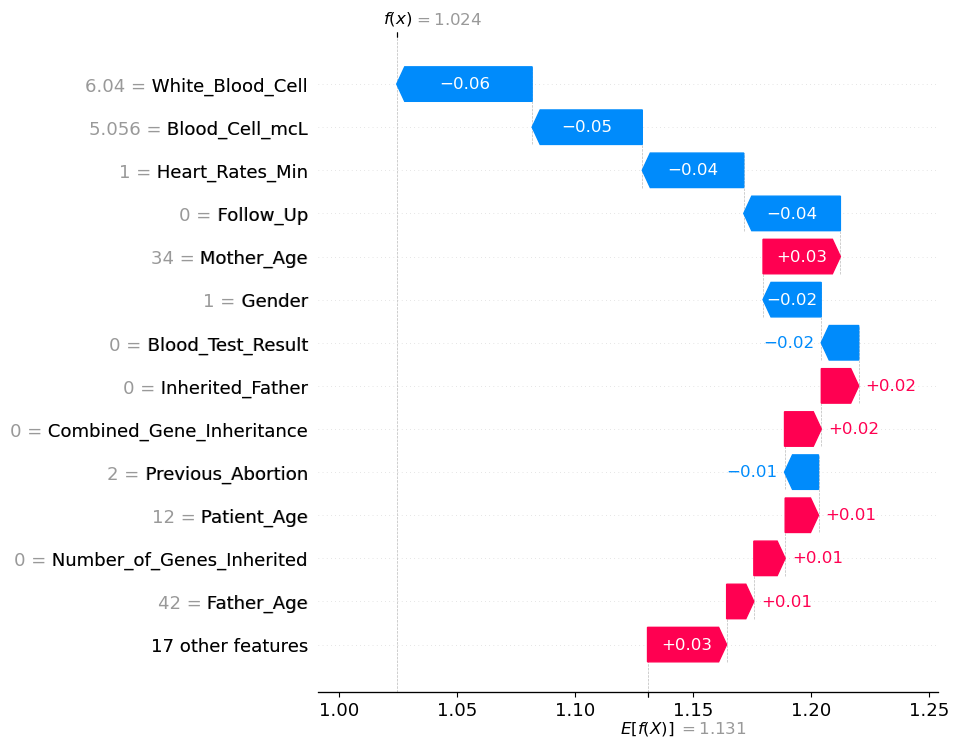

In [82]:

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

instance_index = 0
class_index = 0

instance_shap_values = shap_values[instance_index, :, class_index]

shap.plots.waterfall(instance_shap_values, max_display=14)


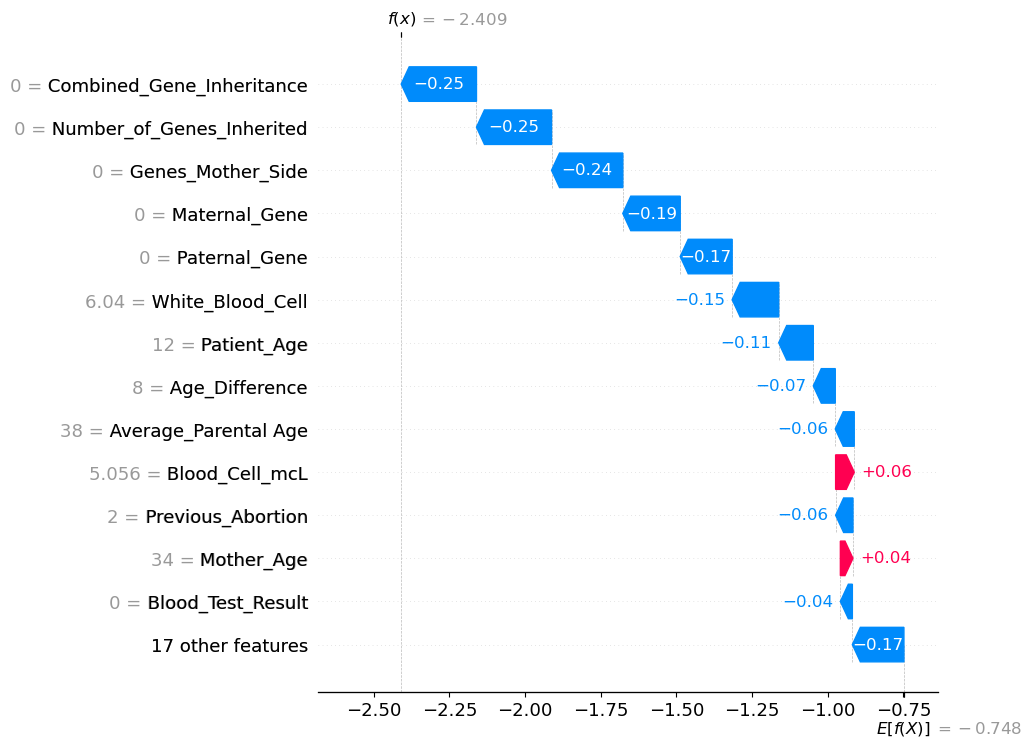

In [83]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

instance_index = 0
class_index = 1

instance_shap_values = shap_values[instance_index, :, class_index]

shap.plots.waterfall(instance_shap_values, max_display=14)


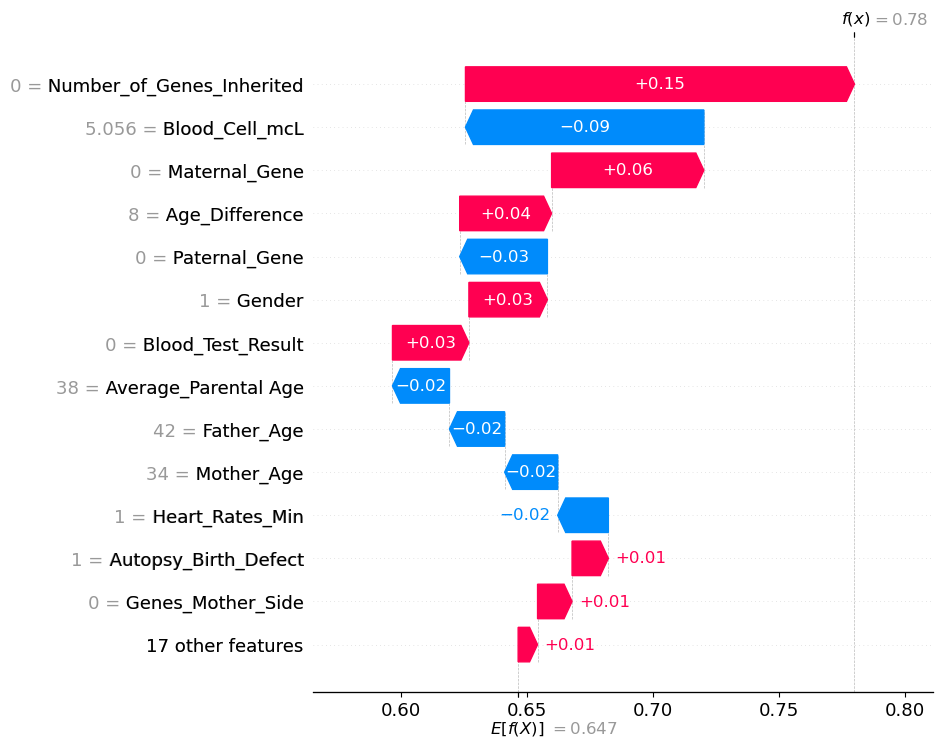

In [84]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

instance_index = 0
class_index = 2

instance_shap_values = shap_values[instance_index, :, class_index]

shap.plots.waterfall(instance_shap_values, max_display=14)


### **Inference - Waterfall Plot**


### Mitochondrial genetic inheritance disorders (First Plot)
- **Prediction:** The model's output is above the base value (E[f(X)]), suggesting that the model leans towards predicting this disorder for the instance.
- **Negative Impact:** The most significant negative drivers away from this class are the white blood cell count and blood cell count, suggesting that within the model's learned patterns, certain levels of these counts are strong indicators that may reduce the likelihood of this mitochondrial disorder.
- **Positive Impact:** Few features push the prediction towards this class, with the mother's age having a slight positive impact, which may indicate that maternal age is a factor in the model's decision-making process for predicting mitochondrial disorders.

### Multifactorial genetic inheritance disorders (Second Plot)
- **Prediction:** The model's output is significantly below the base value, indicating a low probability of this disorder for the instance.
- **Negative Impact:** Gene-related features, such as combined gene inheritance, the number of genes inherited, and genes from the mother's side, have the most substantial negative contributions. This could mean that for this instance, the presence or absence of certain genetic factors is highly influential in moving the prediction away from this class.
- **Positive Impact:** Positive contributions are minimal and less significant, which might suggest that for this instance, there is not enough evidence to support the prediction of a multifactorial genetic inheritance disorder based on the model's learned patterns.

### Single-gene inheritance diseases (Third Plot)
- **Prediction:** The model's output is closer to the base value compared to the second plot, indicating a somewhat neutral to slight inclination towards this disorder.
- **Positive Impact:** The number of genes inherited contributes positively and most significantly towards predicting this class, which aligns with the name of the disorder, indicating the model sees a strong relationship between gene inheritance and the likelihood of a single-gene disorder.
- **Negative Impact:** Although the age difference and paternal gene have negative impacts, they are small. This could imply that while they are factors the model considers, their roles are not as critical for this particular instance in predicting a single-gene inheritance disease.

### Beeswarm Plot

In [85]:
class_names=['Mitochondrial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases']

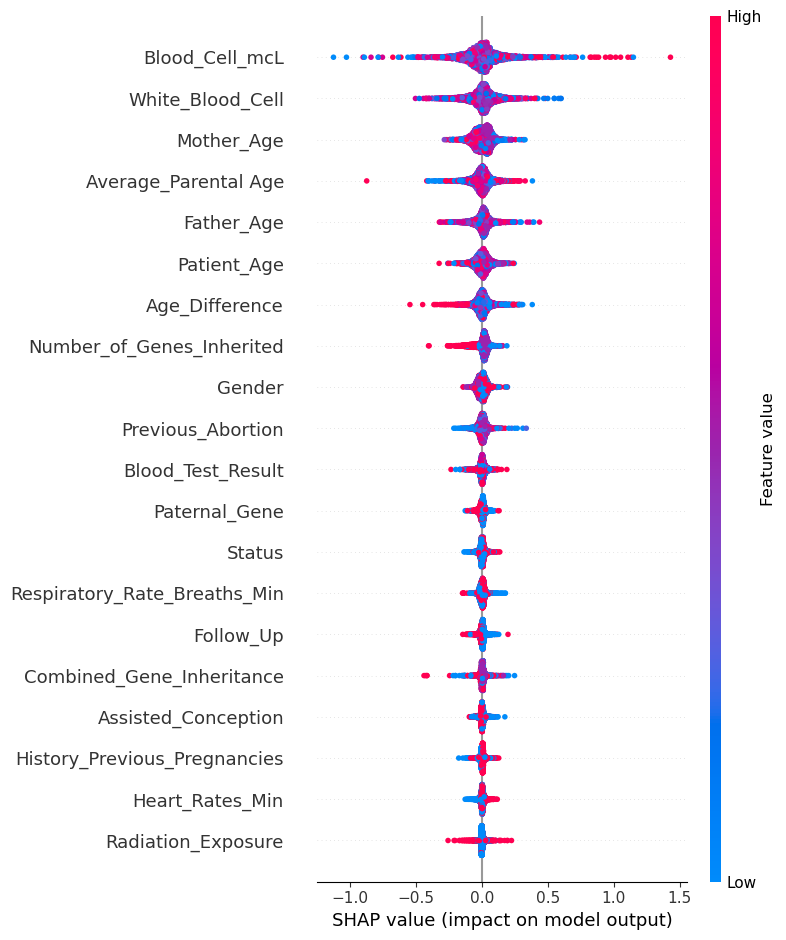

In [86]:
shap.summary_plot(shap_values[:, :, 0], X_test, plot_type="dot")

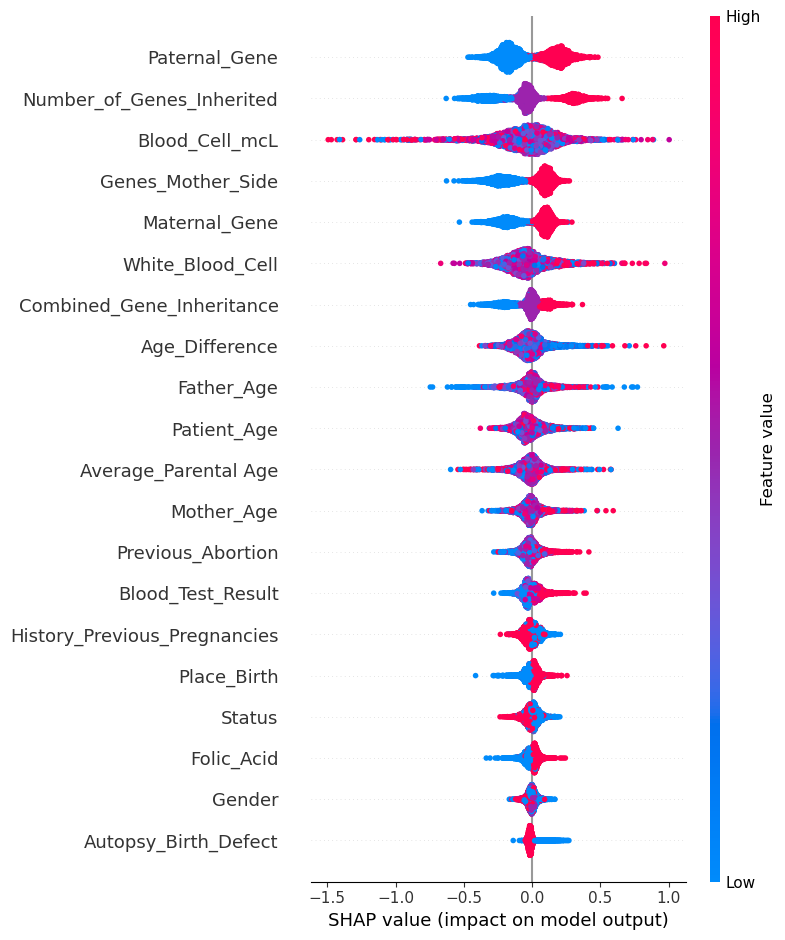

In [87]:
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="dot")

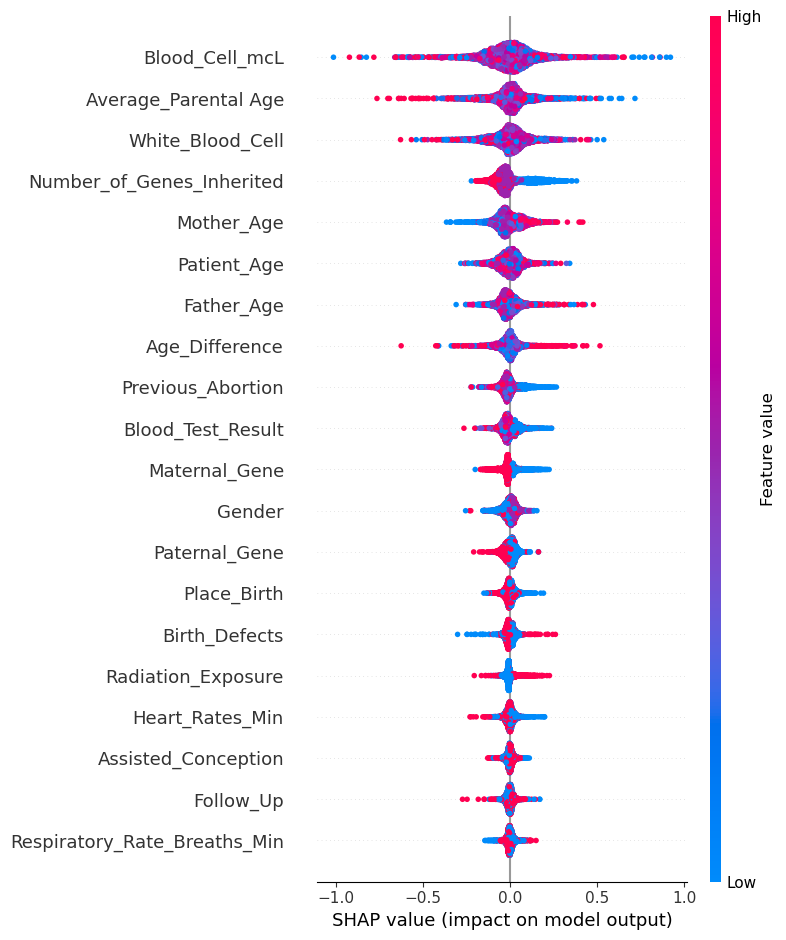

In [88]:
shap.summary_plot(shap_values[:, :, 2], X_test, plot_type="dot")

### **Inference - Beeswarm Plot**

### First Class (Plot 1)
- **Blood Cell mCL, Average Parental Age, and White Blood Cell:** These features have high variability in their impact, with significant contributions in both directions (positive and negative SHAP values).
- **Number of Genes Inherited and Previous Abortion:** Tend to increase the model's prediction for this class.
- **Patient Age and Father Age:** Seem to decrease the prediction more often than they increase it.
- **Other Features:** Like Maternal Gene, Gender, and Paternal Gene, have varying impacts across different instances but do not show a clear trend in one direction.


### Second Class (Plot 2)
- **Paternal Gene, Number of Genes Inherited, and Blood Cell mCL:** These features have a mix of high and low impact across different instances, showing they can either increase or decrease the prediction, depending on the individual's values.
- **Combined Gene Inheritance and White Blood Cell:** These features are primarily lowering the prediction.
- **Previous Abortion and Patient Age:** Appear to be increasing the prediction more frequently than they decrease it.
- **Remaining Features:** Have varying impacts but tend to have a smaller magnitude of influence compared to the ones listed above.

### Third Class (Plot 3)
- **Blood Cell mCL, Average Parental Age, and White Blood Cell:** These features have high variability in their impact, with significant contributions in both directions (positive and negative SHAP values).
- **Number of Genes Inherited and Previous Abortion:** Tend to increase the model's prediction for this class.
- **Patient Age and Father Age:** Seem to decrease the prediction more often than they increase it.
- **Other Features:** Like Maternal Gene, Gender, and Paternal Gene, have varying impacts across different instances but do not show a clear trend in one direction.




## Conclusion

The overall conclusion from the various machine learning model evaluations and feature impact analyses is that:

- **Model Selection**: Simpler models, specifically Logistic Regression, have performed consistently well across different test sizes compared to more complex models. This indicates that for the dataset in question, a linear model may suffice or even outperform complex ones, potentially due to its ability to generalize better without overfitting.

- **Feature Selection**: The process of feature selection did not significantly alter the accuracy of the models, suggesting either the original feature set was already optimal, or the feature selection method did not effectively identify and remove non-informative features.

- **Feature Impact**: Certain features, particularly those related to gene inheritance and blood cell counts, have been identified as influential in predicting genetic disorders. However, the impact of these features varied across instances, which reflects the complexity of genetic inheritance and the possible interaction effects among features.

- **Stability Across Test Sizes**: The models demonstrated stable performance regardless of the test size, implying that the model training is robust and not overly sensitive to the particular split of training and testing data.

- **Implications for Healthcare**: In the context of predicting genetic inheritance disorders, the analysis underscores the importance of feature selection and model simplicity for accurate and interpretable results. This could have practical implications for healthcare, where reliable and explainable models are crucial for decision-making.

The conclusion is that in the realm of predicting genetic disorders, maintaining model simplicity without sacrificing accuracy is beneficial. Furthermore, while feature selection is a critical step in model optimization, its effectiveness is highly contingent on the methods used and the inherent characteristics of the dataset.

## Future Scope

Looking ahead, the project can be expanded in several directions to enhance its accuracy, applicability, and utility in real-world scenarios:

- **Incorporating Larger and More Diverse Datasets**: Expanding the dataset to include a wider variety of genetic information from diverse populations can improve the model's accuracy and generalizability. This would also allow for the identification of more subtle genetic markers associated with disorders, potentially uncovering new insights into genetic influences on health.

- **Exploring Advanced ML and AI Techniques**: Investigating the use of more sophisticated machine learning algorithms and artificial intelligence techniques, such as deep learning and reinforcement learning, could enhance the model's predictive capabilities. Additionally, exploring hybrid models that combine different types of algorithms could provide a more nuanced understanding of the data.

- **Clinical Validation and Integration**: Partnering with healthcare institutions for clinical validation of the models is crucial. Validating the predictions in a clinical setting would not only establish the models' efficacy but also pave the way for integrating these tools into healthcare systems, allowing for real-time genetic disorder prediction and intervention.

- **Ethical and Privacy Considerations**: As the project scales, addressing the ethical implications of genetic prediction and ensuring the privacy and security of genetic data become increasingly important. Developing robust protocols for data handling, consent, and anonymization would be essential to maintain trust and protect individuals' rights.

- **Public Health Applications**: Beyond individual genetic disorder prediction, the models could be adapted for public health applications, such as predicting the prevalence of genetic disorders in different populations or evaluating the potential impact of genetic disorders on public health systems.

- **Explainability and Transparency Enhancement**: Continuing to refine and develop new methods for explainability in AI can help make the models even more transparent and understandable to users. This could involve the creation of more intuitive visualization tools or the development of new techniques for explaining complex AI decisions.

- **Collaboration with Genomic Researchers and Ethicists**: Working closely with genomic researchers can provide new insights and data sources for improving models, while collaboration with ethicists can ensure that the project addresses ethical concerns related to genetic prediction and privacy.

By pursuing these avenues, the project can significantly advance the field of genetic disorder prediction, offering more accurate, understandable, and ethically responsible solutions that benefit both individuals and the broader healthcare landscape.
